In [ ]:
#@markdown # Instalar bibliotecas requeridas 
#@markdown ### Antes de utilizar las funciones, por favor, ejecute la celda de Colab que se encuentra a continuación para instalar las bibliotecas requeridas y definir las funciones.
#@markdown ### Puede hacerlo haciendo clic en el botón "Ejecutar" o utilizando la combinación de teclas "Ctrl + Enter".
#@markdown 
#@markdown Importar módulos necesarios
#@markdown Definir la ruta del modelo pre-entrenado
#@markdown Crear una tubería de difusión estable a partir del modelo pre-entrenado
#@markdown Definir una función para crear una cuadrícula de imágenes
#@markdown Definir una función para generar imágenes utilizando el modelo de lenguaje natural y difusión estocástica

#@markdown Recuerda tener activada una GPU de lo contrario te saldra error,
#@markdown para verificar si tienes una GPU activada, puedes ir a "Entorno de ejecución" en la barra de menú de Colab, seleccionar "Cambiar tipo de entorno de ejecución"
#@markdown y asegurarte de que la opción de "Acelerador de hardware" esté configurada en "GPU".

%%capture
!pip install transformers scipy ftfy
!pip install diffusers[torch]
import numpy as np
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

dir_model = "Jartemio/The_Owl_Characters_V2"

# Crear una tubería de difusión estable a partir del modelo pre-entrenado
scheduler = EulerAncestralDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe = StableDiffusionPipeline.from_pretrained(dir_model, custom_pipeline="lpw_stable_diffusion", scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")


from PIL import Image

def image_grid(imgs, rows, cols):
    """
    Crea una cuadrícula de imágenes a partir de una lista de imágenes.

    Args:
        imgs (list): Lista de objetos de imagen PIL.
        rows (int): Número de filas en la cuadrícula de imágenes.
        cols (int): Número de columnas en la cuadrícula de imágenes.

    Returns:
        Imagen PIL que representa la cuadrícula de imágenes.
    """
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


def generar_imagenes(texto, texto_negativo, steps=20, count=1, input_seed=0, guidance_scale=7.5, imagen_height=8, imagen_width=8):
    """
    Genera imágenes utilizando el modelo de lenguaje natural y difusión estocástica.

    Args:
        texto (str): Texto de entrada para la generación de imágenes.
        texto_negativo (str): Texto negativo para la generación de imágenes.
        steps (int): Número de pasos de inferencia utilizados para generar imágenes.
        count (int): Número de veces que se genera un conjunto de imágenes.
        input_seed (int): Semilla aleatoria utilizada para la generación de imágenes.
        guidance_scale (float): Escala de orientación utilizada para la generación de imágenes.
        imagen_height (int): Altura de las imágenes generadas.
        imagen_width (int): Ancho de las imágenes generadas.

    Returns:
        Una lista de objetos de imagen PIL que representan las imágenes generadas.
    """
    image_all = []
    seed_show = []

    for i in range(count):
        prompt = texto
        negative_prompt_temp = texto_negativo

        # Calcular las dimensiones de la imagen generada
        hg = (8*8)*imagen_height 
        wd = (8*8)*imagen_width

        if input_seed > -1:
            print(f"seed personalizada a: {input_seed}. Se pondra solo una imagen")
            seed = input_seed
            count = 1
        else:
            seed = np.random.randint(0, 9999999999)
            
            
        generator = torch.Generator("cuda").manual_seed(int(seed))

        print(f"Imagen {i+1}")
        print(f"seed: {seed}")
        with autocast("cuda"):
            # Generar la imagen utilizando la tubería de difusión estable y la semilla aleatoria
            image = pipe(prompt=prompt, width=wd, height=hg, negative_prompt=negative_prompt_temp, guidance_scale=guidance_scale, num_inference_steps=steps, generator=generator).images

        for index, imageN in enumerate(image):
            # Mostrar la imagen generada
            display(imageN)
            image_all.append(imageN)

        if input_seed > -1:
            return image_all

    return image_all

%%capture


Imagen 1
seed: 2290939915


  0%|          | 0/50 [00:00<?, ?it/s]

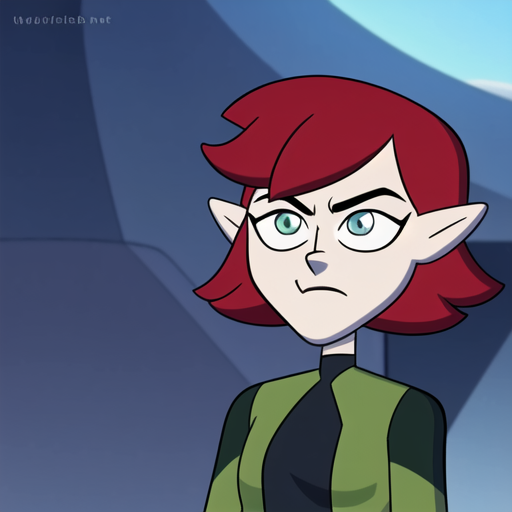

In [ ]:

#@markdown # <strong> [Jartemio/The_Owl_Characters_V2](https://huggingface.co/Jartemio/The_Owl_Characters_V2)</strong>

#@markdown ### Las siguientes etiquetas corresponden a personajes de la serie animada "The Owl House". Puedes incluirlas en el prompt para generar imágenes relacionadas con ellos.

#@markdown - AmityBlight
#@markdown - EdalynClawthorne
#@markdown - EmperorBelos
#@markdown - GusPorter
#@markdown - HunterGoldenGuard
#@markdown - LilithClawthorne
#@markdown -LuzNoceda
#@markdown -RaineWhispers
#@markdown -TheCollector
#@markdown -WillowPark
#@markdown -KingClawthorne

#@markdown ### Parámetros de entrada
#@markdown - `prompt`: Texto de entrada para la generación de imágenes. Debe incluir la etiqueta "aniscreen" para que el modelo se active en la imagen.
#@markdown - `prompt_negative`: Texto negativo para la generación de imágenes.
#@markdown - `steps`: Número de pasos de inferencia utilizados para generar imágenes (Si es un valor mayor a -1 se genera solo una imagen con esa semilla). Valor mínimo: 10. Valor máximo: 500. Incremento: 10.
#@markdown - `tiros_count`: Número de veces que se genera un conjunto de imágenes.
#@markdown - `input_seed`: Semilla aleatoria utilizada para la generación de imágenes. Valor mínimo: 0.
#@markdown - `guidance_scale`: Escala de orientación utilizada para la generación de imágenes. Valor mínimo: 0.0.
#@markdown - `imagen_height`: Altura de las imágenes generadas. Valor mínimo: 2. Valor máximo: 12. Incremento: 1.
#@markdown - `imagen_width`: Ancho de las imágenes generadas. Valor mínimo: 2. Valor máximo: 12. Incremento: 1.

prompt = "aniscreen,1girl, red hair, upper body" #@param {type:"string"}
prompt_negative = "worst quality, bad quality, text, signature, watermark, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, poorly drawn face, mutation, disfigured, messy drawing, broken legs, nsfw" #@param {type:"string"}
steps = 50 #@param {type:"integer", min:10, max:500, step:10}
tiros_count = 1 #@param {type:"integer"}
input_seed = -1 #@param {type:"integer", min:-1}
guidance_scale = 7.5 #@param {type:"number", min:0.0}
imagen_height = 8 #@param {type:"slider", min:2, max:12, step:1}
imagen_width = 8 #@param {type:"slider", min:2, max:12, step:1}

# Generar imágenes utilizando los parámetros definidos anteriormente

if tiros_count > 0:
    image_all = generar_imagenes(prompt, prompt_negative, steps, tiros_count, input_seed, guidance_scale, imagen_height, imagen_width)
    
    n_images = len(image_all)
    n_cols = min(n_images, 3)
    n_rows = int(np.ceil(n_images / n_cols))
    grid_width = imagen_width * 64 * n_cols
    grid_height = imagen_height * 64 * n_rows

    # Crear una imagen PIL grande para la cuadrícula
    grid = Image.new('RGB', size=(grid_width, grid_height))

    # Copiar cada imagen generada en la cuadrícula
    for i, img in enumerate(image_all):
        col = i % n_cols
        row = i // n_cols
        x = col * imagen_width * 64
        y = row * imagen_height * 64
        grid.paste(img, box=(x, y))
        
if tiros_count > 1:
    display(grid)
